## Gleichmäßig beschleunigte Bewegung
### Grundlagen 

Eine gleichmäßig beschleunigte Bewegung liegt vor, wenn auf einen Körper eine konstante äußere Kraft wirkt. Nach dem zweiten Newtonschen Axiom gilt:

$$
\vec{F} = m \vec{a}
$$

Die Beschleunigung bleibt somit konstant, solange die Kraft konstant bleibt. Für eine Bewegung in x-Richtung ergeben sich die kinematischen Grundgleichungen:

$$
v(t) = v_0 + a t
$$
$$
x(t) = x_0 + v_0 t + \frac{1}{2} a t^2
$$

Dabei sind $x_0$ der Anfangsort, $v_0$ die Anfangsgeschwindigkeit und $a$ die konstante Beschleunigung.  
Ein Beispiel für eine gleichmäßig beschleunigte Bewegung ist die Bewegung eines Gleiters auf dem Luftkissentisch, der über ein Gewicht beschleunigt wird.  
Durch das Aufzeichnen der Orts-Zeit-Abhängigkeit kann man $v_0$, $a$ und $x_0$ bestimmen und daraus die wirkende Kraft und den Gleitreibungskoeffizienten ableiten.

### Durchführung

Für den Versuch wird ein Gleiter mit einem Filzring auf den Luftkissentisch gelegt.  
Ein Faden verbindet den Gleiter über eine Umlenkrolle mit einem kleinen Gewicht $m_2 = 20\,\mathrm{g}$, das eine konstante Zugkraft auf den Gleiter ausübt.  
Nach dem Einschalten des Motors wird der Gleiter festgehalten, die Kameraaufnahme gestartet und anschließend der Gleiter losgelassen, ohne ihm einen zusätzlichen Impuls zu geben.  
Mit der Software *Vicap 3* wird die Bewegung aufgezeichnet und mit *Tracker* analysiert.  
Aus der gemessenen Orts-Zeit-Abhängigkeit $x(t)$ wird durch Fitten einer Parabel zweiter Ordnung die Beschleunigung $a$, die Anfangsgeschwindigkeit $v_0$ und der Anfangsort $x_0$ bestimmt.  
Aus der bekannten Masse und Beschleunigung wird die wirkende Kraft berechnet und daraus der Gleitreibungskoeffizient $\mu_G$ bestimmt.


Ergebnisse des quadratischen Fits r(t) = a2*t^2 + a1*t + a0
a2 = 0.599774 ± 0.00309
a1 = 0.301635 ± 0.0064
a0 = 0.048526 ± 0.00276

Physikalische Parameter (r(t) = 0.5*a*t^2 + v0*t + x0):
a   = 1.199548 m/s² ± 0.00618
v0  = 0.301635 m/s  ± 0.0064
x0  = 0.048526 m    ± 0.00276

Chi^2/dof = 0.000021


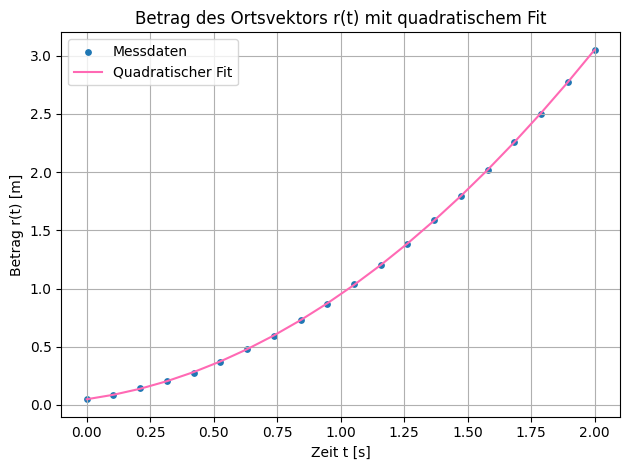

=== Ergebnisse ===
F_exp  = 0.26390 ± 2.17e-03 N
F_theo = 0.19620 ± 9.81e-03 N
DeltaF = -0.06770 N

mu_G   = 0.06169 ± 4.46e-03


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

# ====== Dateiname ======
fname = "example.csv"   # oder eine andere Datei mit den Spalten t, x, y

# ====== Trennzeichen automatisch erkennen (Komma oder Tabulator) ======
with open(fname, "r", encoding="utf-8") as f:
    first_line = f.readline()
    if "\t" in first_line:
        delim = "\t"
    elif "," in first_line:
        delim = ","
    else:
        raise ValueError("Unbekanntes Trennzeichen: Datei muss Komma oder Tabulator verwenden")

# ====== Daten einlesen ======
t_list, x_list, y_list = [], [], []
with open(fname, "r", encoding="utf-8") as f:
    reader = csv.DictReader(f, delimiter=delim)
    for row in reader:
        # Dezimalkommas in Dezimalpunkte umwandeln
        t_list.append(float(str(row["t"]).replace(",", ".")))
        x_list.append(float(str(row["x"]).replace(",", ".")))
        y_list.append(float(str(row["y"]).replace(",", ".")))

t = np.array(t_list)
x = np.array(x_list)
y = np.array(y_list)

# ====== Betrag des Ortsvektors berechnen ======
r = np.sqrt(x**2 + y**2)

# ====== Quadratischer Fit: r(t) = a2*t^2 + a1*t + a0 ======
(coefs, cov) = np.polyfit(t, r, 2, cov=True)
a2, a1, a0 = coefs
r_fit = np.polyval(coefs, t)

# ====== Abgeleitete physikalische Parameter ======
a = 2 * a2    # Beschleunigung
v0 = a1       # Anfangsgeschwindigkeit
x0 = a0       # Anfangsposition

# ====== Unsicherheiten aus der Kovarianzmatrix ======
sigma_a2, sigma_a1, sigma_a0 = np.sqrt(np.diag(cov))
sigma_a  = 2 * sigma_a2
sigma_v0 = sigma_a1
sigma_x0 = sigma_a0

# ====== Chi² pro Freiheitsgrad ======
chi2 = np.sum((r - r_fit)**2)
dof = len(r) - 3
chi2_dof = chi2 / dof

# ====== Ergebnisse ausgeben ======
print("Ergebnisse des quadratischen Fits r(t) = a2*t^2 + a1*t + a0")
print(f"a2 = {a2:.6f} ± {sigma_a2:.3g}")
print(f"a1 = {a1:.6f} ± {sigma_a1:.3g}")
print(f"a0 = {a0:.6f} ± {sigma_a0:.3g}")
print()
print("Physikalische Parameter (r(t) = 0.5*a*t^2 + v0*t + x0):")
print(f"a   = {a:.6f} m/s² ± {sigma_a:.3g}")
print(f"v0  = {v0:.6f} m/s  ± {sigma_v0:.3g}")
print(f"x0  = {x0:.6f} m    ± {sigma_x0:.3g}")
print()
print(f"Chi^2/dof = {chi2_dof:.6f}")

# ====== Plot erstellen ======
plt.scatter(t, r, s=15, label="Messdaten")
plt.plot(t, r_fit, label="Quadratischer Fit", color="hotpink")
plt.xlabel("Zeit t [s]")
plt.ylabel("Betrag r(t) [m]")
plt.title("Betrag des Ortsvektors r(t) mit quadratischem Fit")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# ===== Eingabewerte =====
m1 = 0.200     # kg   Masse des Gleiters
m2 = 0.020     # kg   Masse des hängenden Gewichts
g = 9.81       # m/s^2

# ===== Unsicherheiten =====
sigma_m1 = 0.001   # kg  (z. B. Waage ±1 g)
sigma_m2 = 0.001   # kg 

# ===== Kräfte berechnen =====
F_exp  = (m1 + m2) * a
F_theo = m2 * g
deltaF = (F_theo - F_exp)

# ===== Gleitreibungskoeffizient =====
mu_G = F_theo - F_exp / (m1 * g)

# ===== Fehlerfortpflanzung =====
# partielle Ableitungen
# F_exp = (m1+m2)*a => dF/dm1 = a,  dF/dm2 = a,  dF/da = (m1+m2)
sigma_Fexp = np.sqrt((a*sigma_m1)**2 + (a*sigma_m2)**2 + ((m1+m2)*sigma_a)**2)

# F_theo = m2*g => dF/dm2 = g
sigma_Ftheo = g * sigma_m2

# μ_G = [m2*g - (m1+m2)*a] / (m1*g)
dmu_dm1 = (-a*g*m1 - g*(m2*g - (m1+m2)*a)) / (m1**2 * g**2)
dmu_dm2 = (g - a) / (m1 * g)
dmu_da  = -(m1 + m2) / (m1 * g)

sigma_mu = np.sqrt(
    (dmu_dm1 * sigma_m1)**2 +
    (dmu_dm2 * sigma_m2)**2 +
    (dmu_da  * sigma_a )**2
)

# ===== Ergebnisse =====
print("=== Ergebnisse ===")
print(f"F_exp  = {F_exp:.5f} ± {sigma_Fexp:.2e} N")
print(f"F_theo = {F_theo:.5f} ± {sigma_Ftheo:.2e} N")
print(f"DeltaF = {deltaF:.5f} N")
print()
print(f"mu_G   = {mu_G:.5f} ± {sigma_mu:.2e}")


## Kräftefreie Bewegung
### Grundlagen

Eine kräftefreie Bewegung liegt vor, wenn keine äußeren Kräfte auf den Körper wirken. Nach dem ersten Newtonschen Axiom bewegt sich der Körper dann mit konstanter Geschwindigkeit geradlinig weiter.  
Ein starrer Körper kann sich in diesem Zustand gleichzeitig translatorisch und rotatorisch bewegen. Die Geschwindigkeit eines beliebigen Punktes des Körpers setzt sich aus der Schwerpunktgeschwindigkeit und der Rotationsgeschwindigkeit zusammen:

$$
\vec{v} = \vec{v}_S + \vec{\omega} \times \vec{r}
$$

Hierbei bezeichnet $\vec{v}_S$ die Geschwindigkeit des Schwerpunkts, $\vec{\omega}$ die Winkelgeschwindigkeit und $\vec{r}$ den Ortsvektor eines Punktes relativ zum Schwerpunkt.  
Die Winkelgeschwindigkeit beschreibt die Rotation des Körpers um seine Schwerpunktachse und wird in der Einheit $\mathrm{rad/s}$ angegeben.  
Bei einer ideal kräftefreien Bewegung auf dem Luftkissentisch bleibt die Bahn des Schwerpunkts geradlinig, während der Körper gleichzeitig um diesen Schwerpunkt rotiert.

### Durchführung
Der Gleiter wird mit einem markierten Schwerpunkt und einem markierten Peripheriepunkt (z. B. einem gelben Punkt) versehen.  
Er wird durch einen kurzen Stoß in gleichförmige Bewegung versetzt und gleichzeitig in Rotation gebracht.  
Die Bewegung wird mit der Kamera aufgezeichnet, bis der Gleiter an der Begrenzung reflektiert wird.  
In der Analyse werden sowohl der Schwerpunkt als auch der Peripheriepunkt im Programm *Tracker* getrackt.  
Aus deren Bahnverläufen im XY-Diagramm wird die gleichförmige Translation des Schwerpunkts und die Rotation des Peripheriepunktes dargestellt.  
Die Winkelgeschwindigkeit $\omega$ wird durch Auswertung der periodischen Änderung der Peripheriegeschwindigkeit oder aus der Änderung des Rotationswinkels $\varphi(t)$ bestimmt.


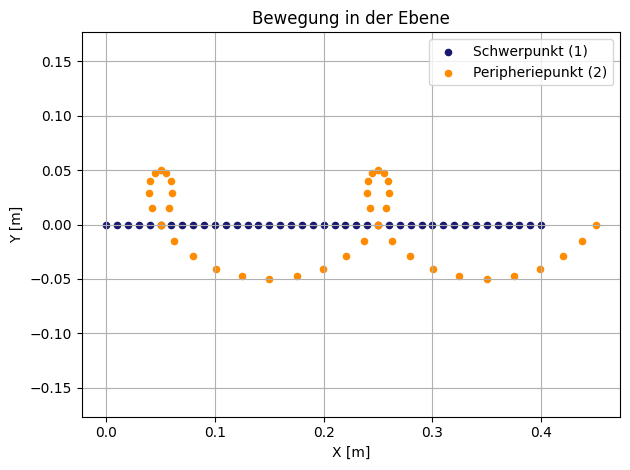

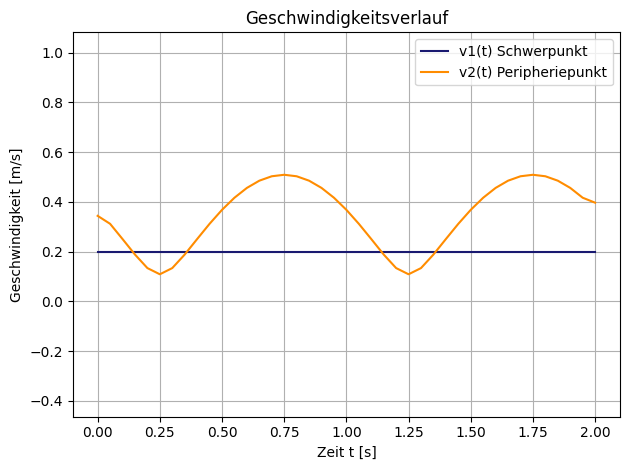

=== Winkelgeschwindigkeit aus Peak-Abständen ===
ω_peaks = 6.28319 ± 0.22 1/s


In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt

# ===== Datei laden =====
fname = "beispiel_rotation.csv"  # Datei mit den Spalten: t, x1, y1, v1, x2, y2, v2

# ===== Trennzeichen (Komma oder Tab) automatisch erkennen =====
with open(fname, "r", encoding="utf-8") as f:
    first_line = f.readline()
    if "\t" in first_line:
        delim = "\t"
    elif "," in first_line:
        delim = ","
    else:
        raise ValueError("Unbekanntes Trennzeichen: Datei muss Komma oder Tabulator verwenden")
# ===== Daten einlesen =====
t, x1, y1, v1, x2, y2, v2 = ([] for _ in range(7))

with open(fname, "r", encoding="utf-8") as f:
    reader = csv.DictReader(f, delimiter=delim)
    for row in reader:
        t.append(float(str(row["t"]).replace(",", ".")))
        x1.append(float(str(row["x1"]).replace(",", ".")))
        y1.append(float(str(row["y1"]).replace(",", ".")))
        v1.append(float(str(row["v1"]).replace(",", ".")))
        x2.append(float(str(row["x2"]).replace(",", ".")))
        y2.append(float(str(row["y2"]).replace(",", ".")))
        v2.append(float(str(row["v2"]).replace(",", ".")))

# In numpy Arrays umwandeln
t  = np.array(t)
x1 = np.array(x1); y1 = np.array(y1); v1 = np.array(v1)
x2 = np.array(x2); y2 = np.array(y2); v2 = np.array(v2)

# ===== Trajektorien (X,Y) plotten =====
plt.figure()
plt.scatter(x1, y1, label="Schwerpunkt (1)", color="midnightblue", s=20)
plt.scatter(x2, y2, label="Peripheriepunkt (2)", color="darkorange", s=20)
plt.gca().set_aspect("equal", adjustable="datalim")
plt.xlabel("X [m]")
plt.ylabel("Y [m]")
plt.title("Bewegung in der Ebene")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# ===== Geschwindigkeiten über die Zeit plotten =====
plt.figure()
plt.plot(t, v1, label="v1(t) Schwerpunkt", color="midnightblue")
plt.plot(t, v2, label="v2(t) Peripheriepunkt", color="darkorange")
plt.gca().set_aspect("equal", adjustable="datalim")
plt.xlabel("Zeit t [s]")
plt.ylabel("Geschwindigkeit [m/s]")
plt.title("Geschwindigkeitsverlauf")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# ======== Peak-Erkennung ========
def finde_peaks(y):
    """
    Findet lokale Maxima und Minima im Signal y.
    Gibt zwei Listen mit den Indizes der Maxima und Minima zurück.
    """
    y = np.array(y)
    idx_max = []
    idx_min = []
    for i in range(1, len(y)-1):
        if y[i] > y[i-1] and y[i] > y[i+1]:
            idx_max.append(i)
        if y[i] < y[i-1] and y[i] < y[i+1]:
            idx_min.append(i)
    return idx_max, idx_min


# ======== ω nur aus Peak-Abständen in v2(t) (mit Unsicherheit) ========
idx_max, idx_min = finde_peaks(v2)

omega_peaks = None
sigma_omega = None

# Hilfsfunktion: ω und Unsicherheit aus einer Liste von Peak-Indizes berechnen
def omega_aus_peaks(t, idx):
    idx = np.array(idx, dtype=int)
    if len(idx) < 2:
        return None, None

    # Zeitabstände zwischen aufeinanderfolgenden Peaks (Perioden)
    T_i = np.diff(t[idx])
    T_mean = np.mean(T_i)

    # Unsicherheit von T:
    # - Wenn >=3 Intervalle: Standardfehler des Mittelwerts von T
    # - Wenn genau 1 Intervall: Schätzung über Zeitauflösung dt (jeder Peak ±dt/2)
    if len(T_i) >= 3:
        s_T = np.std(T_i, ddof=1)
        sigma_T = s_T / np.sqrt(len(T_i))
    elif len(T_i) == 2:
        # zwei Intervalle -> Standardfehler definieren
        s_T = np.std(T_i, ddof=1)
        sigma_T = s_T / np.sqrt(2)
    else:
        # nur ein Intervall
        dt = np.median(np.diff(t))  # Zeitauflösung
        sigma_T = dt / np.sqrt(2)   # beide Peak-Zeiten tragen bei

    # ω und Fehlerfortpflanzung: ω = 2π / T, dω/dT = -2π/T^2
    omega = 2 * np.pi / T_mean
    sigma_omega = (2 * np.pi / (T_mean**2)) * sigma_T
    return omega, sigma_omega


# Bevorzugt Maxima, sonst Minima
if len(idx_max) >= 2:
    omega_peaks, sigma_omega = omega_aus_peaks(t, idx_max)
elif len(idx_min) >= 2:
    omega_peaks, sigma_omega = omega_aus_peaks(t, idx_min)

# ======== Ergebnis ========
print("=== Winkelgeschwindigkeit aus Peak-Abständen ===")
if omega_peaks is not None:
    if sigma_omega is not None:
        print(f"ω_peaks = {omega_peaks:.6g} ± {sigma_omega:.2g} 1/s")
    else:
        print(f"ω_peaks = {omega_peaks:.6g} 1/s (Unsicherheit nicht bestimmbar)")
else:
    print("ω aus Peak-Abständen: nicht bestimmbar (zu wenige Peaks)")


## Elastischer Stoß
### Grundlagen 

Ein elastischer Stoß ist eine Wechselwirkung zwischen zwei Körpern, bei der sowohl der Gesamtimpuls als auch die Gesamtenergie erhalten bleiben.  
Für zwei Körper der Massen $m_1$ und $m_2$ gilt:

**Impulserhaltung:**
$$
m_1 \vec{v}_1 + m_2 \vec{v}_2 = m_1 \vec{w}_1 + m_2 \vec{w}_2
$$

**Energieerhaltung:**
$$
\frac{1}{2} m_1 v_1^2 + \frac{1}{2} m_2 v_2^2 = \frac{1}{2} m_1 w_1^2 + \frac{1}{2} m_2 w_2^2
$$

Dabei sind $\vec{v}_1, \vec{v}_2$ die Geschwindigkeiten vor dem Stoß und $\vec{w}_1, \vec{w}_2$ die Geschwindigkeiten nach dem Stoß.  
Beim elastischen Stoß wird keine kinetische Energie in Wärme oder innere Energie umgewandelt.  
Der Schwerpunkt des Systems bewegt sich unabhängig von der Wechselwirkung der Körper geradlinig und gleichförmig weiter.

### Durchführung
Zwei Gleiter unterschiedlicher Masse werden vorbereitet.  
Einer der Gleiter wird zusätzlich mit einem Gewicht beschwert, beide werden mit Federringen für den elastischen Stoß ausgestattet.  
Die Gleiter werden auf schrägen Bahnen so ausgerichtet, dass sie sich auf dem Luftkissentisch treffen und elastisch zusammenstoßen.  
Die gesamte Bewegung wird mit der Kamera aufgenommen und anschließend in *Tracker* ausgewertet.  
Es werden die Positionen, Geschwindigkeiten und Impulsvektoren vor und nach dem Stoß bestimmt.  
Zur Überprüfung der Impulserhaltung werden die Komponenten der Impulsvektoren über die Zeit dargestellt.  
Anschließend wird die kinetische Energie der einzelnen Gleiter und des Gesamtsystems als Funktion der Zeit dargestellt, um den Energieerhaltungssatz zu überprüfen.  
Die Bahn des Gesamtschwerpunkts wird ebenfalls dargestellt, um die gleichförmige Bewegung des Schwerpunktes zu bestätigen.


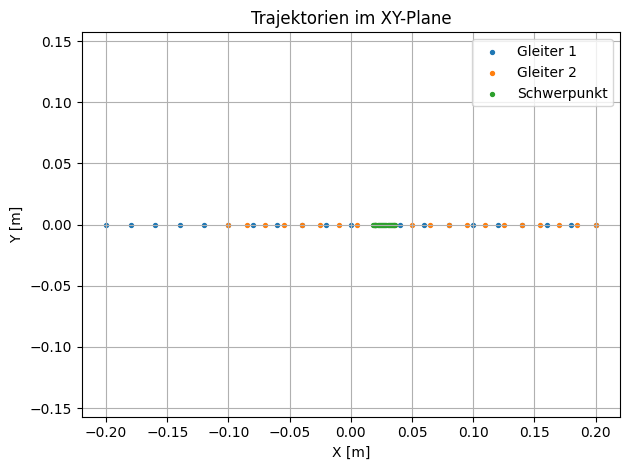

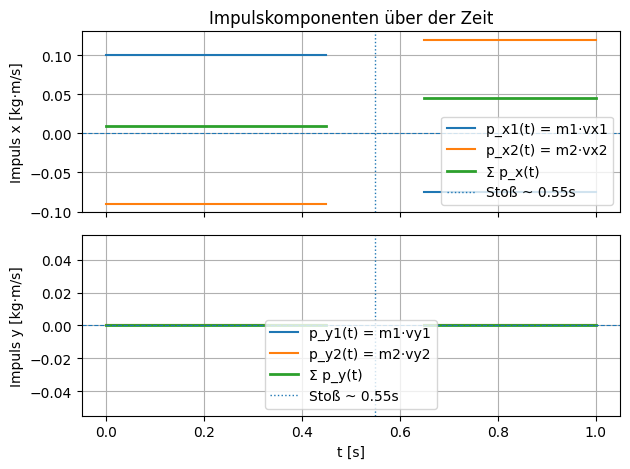

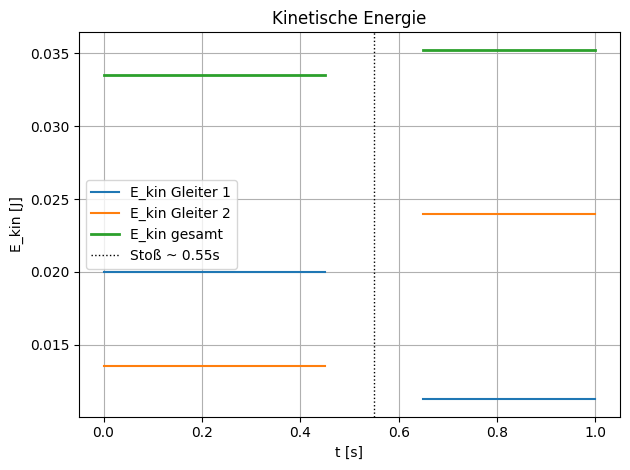

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import csv

# ====== Dateiname ======
fname = "example_collision.csv"   # Datei mit Spalten: t, x1, y1, x2, y2, vx1, vy1, vx2, vy2, v1, v2)

# ====== Trennzeichen automatisch erkennen ======
with open(fname, "r", encoding="utf-8") as f:
    first_line = f.readline()
    if "\t" in first_line:
        delim = "\t"
    elif "," in first_line:
        delim = ","
    elif ";" in first_line:
        delim = ";"
    else:
        raise ValueError("Unbekanntes Trennzeichen")

# ====== Daten einlesen ======
cols = {
    "t": [], "x1": [], "y1": [], "x2": [], "y2": [],
    "vx1": [], "vy1": [], "vx2": [], "vy2": [],
    "v1": [], "v2": []
}

with open(fname, "r", encoding="utf-8") as f:
    reader = csv.DictReader(f, delimiter=delim)
    for row in reader:
        def val(name):
            return float(str(row[name]).replace(",", ".")) if name in row and row[name] else np.nan
        for key in cols:
            cols[key].append(val(key))

# ====== Arrays ======
t   = np.array(cols["t"])
x1, y1 = np.array(cols["x1"]), np.array(cols["y1"])
x2, y2 = np.array(cols["x2"]), np.array(cols["y2"])
vx1, vy1 = np.array(cols["vx1"]), np.array(cols["vy1"])
vx2, vy2 = np.array(cols["vx2"]), np.array(cols["vy2"])
v1, v2 = np.array(cols["v1"]), np.array(cols["v2"])

# ====== Massen eingeben ======
m1 = 0.250  # kg
m2 = 0.300  # kg

# ====== Schwerpunktbahn ======
Rcx = (m1*x1 + m2*x2) / (m1 + m2)
Rcy = (m1*y1 + m2*y2) / (m1 + m2)

plt.figure()
plt.scatter(x1, y1, s=8, label="Gleiter 1")
plt.scatter(x2, y2, s=8, label="Gleiter 2")
plt.scatter(Rcx, Rcy, s=8, label="Schwerpunkt")
plt.gca().set_aspect("equal", adjustable="datalim")
plt.xlabel("X [m]")
plt.ylabel("Y [m]")
plt.title("Trajektorien im XY-Plane")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# ====== Impulse berechnen ======
px1, py1 = m1 * vx1, m1 * vy1
px2, py2 = m2 * vx2, m2 * vy2
Px,  Py  = px1 + px2, py1 + py2

# ====== Stoßzeit (Mask): Minimum des Abstands ======
d = np.hypot(x2 - x1, y2 - y1)
i_col = int(np.nanargmin(d))       # Index des minimalen Abstands
t_col = t[i_col]
t_margin = 0.05

# --- NaN-Lücke um den Stoß (bricht die Linien) ---
gap = (t >= t_col - t_margin) & (t <= t_col + t_margin)
def with_gap(y):
    yg = np.array(y, dtype=float).copy()
    yg[gap] = np.nan
    return yg

px1_g, px2_g, Px_g = with_gap(px1), with_gap(px2), with_gap(Px)
py1_g, py2_g, Py_g = with_gap(py1), with_gap(py2), with_gap(Py)

# ====== Plots: Impulskomponenten über der Zeit ======
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

# px(t)
ax1.plot(t, px1_g, label="p_x1(t) = m1·vx1")
ax1.plot(t, px2_g, label="p_x2(t) = m2·vx2")
ax1.plot(t, Px_g,  label="Σ p_x(t)", linewidth=2)
ax1.axhline(0, linestyle="--", linewidth=0.8)
ax1.axvline(t_col, linestyle=":", linewidth=1, label=f"Stoß ~ {t_col:.2f}s")
ax1.set_ylabel("Impuls x [kg·m/s]")
ax1.set_title("Impulskomponenten über der Zeit")
ax1.grid(True)
ax1.legend()

# py(t)
ax2.plot(t, py1_g, label="p_y1(t) = m1·vy1")
ax2.plot(t, py2_g, label="p_y2(t) = m2·vy2")
ax2.plot(t, Py_g,  label="Σ p_y(t)", linewidth=2)
ax2.axhline(0, linestyle="--", linewidth=0.8)
ax2.axvline(t_col, linestyle=":", linewidth=1, label=f"Stoß ~ {t_col:.2f}s")
ax2.set_xlabel("t [s]")
ax2.set_ylabel("Impuls y [kg·m/s]")
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

# ====== Kinetische Energie ======
E1 = 0.5*m1*v1**2
E2 = 0.5*m2*v2**2
E_tot = E1 + E2
E1_g, E2_g, E_tot_g = with_gap(E1), with_gap(E2), with_gap(E_tot)

plt.figure()
plt.plot(t, E1_g, label="E_kin Gleiter 1")
plt.plot(t, E2_g, label="E_kin Gleiter 2")
plt.plot(t, E_tot_g, label="E_kin gesamt", linewidth=2)
plt.axvline(t_col, linestyle=":", linewidth=1, color="k", label=f"Stoß ~ {t_col:.2f}s")
plt.xlabel("t [s]")
plt.ylabel("E_kin [J]")
plt.title("Kinetische Energie")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()